# Module 9: Big Data Architecture Part 2

# Introduction

In this module, we will explore the evolution of data analytics platforms from the data warehouse to the latest incarnation, the lakehouse, which combines the best of data lakes and warehouses. We will then cover some of the most important data and systems security techniques that a data scientist should know about when designing secure, data-intensive solutions.

This module covers the following topics:

- Data warehouses
- Data lakes  
- Lakehouses
- Techniques for securing data

This module consists of 2 parts:

- **Part 1** - Kafka and the SMACK Stack
- **Part 2** - Data Warehouses, Lakehouses and Securing Data

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

# Learning Outcomes

In this module, you will:

* Learn about analytical databases
* Extend your knowledge of the business use of data lakes
* Be introduced to the emerging lakehouse concept
* Understand how to secure data whether in a datastore or in transit


# Readings and Resources

We invite you to supplement this notebook with the following:

- Databricks. (n.d.). *The Databricks Lakehouse Platform*. https://databricks.com/product/data-lakehouse


- Lorica, B., Armbrust, M., Ghodsi, A., Xin, R. & Zaharia, M. (2020). *What is a Lakehouse?*. https://databricks.com/blog/2020/01/30/what-is-a-data-lakehouse.html


<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-9:-Big-Data-Architecture-Part-2" data-toc-modified-id="Module-9:-Big-Data-Architecture-Part-2">Module 9: Big Data Architecture Part 2</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Data-Warehouses" data-toc-modified-id="Data-Warehouses">Data Warehouses</a></span>
</li>
<li><span><a href="#Data-Lakes" data-toc-modified-id="Data-Lakes">Data Lakes</a></span>
<ul class="toc-item">
<li><span><a href="#Shortcomings-of-data-lakes" data-toc-modified-id="Shortcomings-of-data-lakes">Shortcomings of data lakes</a></span>
</li>
</ul>
</li>
<li><span><a href="#Lakehouses" data-toc-modified-id="Lakehouses">Lakehouses</a></span>
</li>
<li><span><a href="#Delta-Lake" data-toc-modified-id="Delta-Lake">Delta Lake</a></span>
</li>
<li><span><a href="#Techniques-for-Securing-Data" data-toc-modified-id="Techniques-for-Securing-Data">Techniques for Securing Data</a></span>
<ul class="toc-item">
<li><span><a href="#Authentication-and-authorization" data-toc-modified-id="Authentication-and-authorization">Authentication and authorization</a></span>
</li>
<li><span><a href="#Perimeters-and-firewalls" data-toc-modified-id="Perimeters-and-firewalls">Perimeters and firewalls</a></span>
</li>
<li><span><a href="#Identity-and-access-management-(IAM)" data-toc-modified-id="Identity-and-access-management-(IAM)">Identity and access management (IAM)</a></span>
</li>
<li><span><a href="#Security-tokens" data-toc-modified-id="Security-tokens">Security tokens</a></span>
</li>
<li><span><a href="#Role-based-access-control-(RBAC)" data-toc-modified-id="Role-based-access-control-(RBAC)">Role-based access control (RBAC)</a></span>
</li>
<li><span><a href="#Encryption" data-toc-modified-id="Encryption">Encryption</a></span>
</li>
<li><span><a href="#Intrusion-prevention-and-detection" data-toc-modified-id="Intrusion-prevention-and-detection">Intrusion prevention and detection</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Data Warehouses

The promise of good data management is the ability for managers and staff to have access to whatever data they need, where and when they need it. However, this has proven to be an elusive dream &mdash; despite having had good tools and strategies for enterprise wide data integration for many years. The biggest hurdles have been more human than machine in nature. Time and again, individual departments develop their own databases or buy applications with proprietary internal data formats which make data sharing awkward and costly. Department heads often think of themselves as competing with each other to move up the hierarchy and horde their data rather than share it more broadly across the organization.

Some companies have worked to break down these barriers by creating enterprise data architecture and management teams to ensure departments' data is aggregated into a central datastore. These datastores are usually based on either relational databases or in some cases column-oriented stores. Since, as we know, relational databases don't scale very well, the data could be all stored in a single database without a fair amount of summarization. These centralized datastores are usually called **data warehouses**, a term introduced by IBM in the 1980s. Enterprise-level analytics can be run on this aggregated data to get a business-wide picture of what is going on.

Many business intelligence products have been developed that can work with the data in a data warehouse to provide actionable insights to management. Most data warehouses support SQL, which makes it easy to do queries for ad hoc analysis as well. The data inside a data warehouse is typically structured in the form of a *star schema*, which was introduced in the Foundations course.

However, the data warehouse as an integration strategy hasn't always been successful. Very large organizations often end up with multiple data warehouses, often in different corporate divisions and using somewhat incompatible technologies. Even in those cases where an organization has a single data warehouse, the contents are often subsetted out into smaller data warehouses called **data marts** targeted to particular audiences such as the marketing, operations, or internal audit groups.

# Data Lakes

With the creation of the internet, data volumes have soared and the kinds of data that companies work with have become much more varied. Large internet companies solved this big data problem by creating Hadoop (or a proprietary equivalent such as Google's F5 distributed datastore). The teams that developed Hadoop quickly realized that it would be useful for more traditional companies as well. Data warehouses are well-suited for pre-digested, filtered, aggregated, indexed, and structured data for analytics, but Hadoop is excellent for capturing huge quantities of raw data at the source. Why not capture and retain all of a company's raw data? Then, it can be analyzed whenever we want.

With a relational datastore you need to decide in advance what the schema is going to look like based on the kind of analysis you expect to do. HDFS allows you to retain *all the data* and figure out what you want to do with it later.  Thus, the concept of the **data lake** was born: a central repository for capturing all raw enterprise data. Typically, data lake technology is free, open source, and uses cheap servers rather than the high-end ones often required by proprietary data warehouse systems, making it very attractive.

We know that HDFS can store large amounts of structured, semi-structured, and unstructured data. And, it isn't limited to any specific data format. Also, when Hadoop was created, it appeared to offer the ability to do analytics via MapReduce.

## Shortcomings of data lakes 

However, data lakes can't completely replace data warehouses. So, we now have another layer of complex technology on top of the previously-existing operational data stores and data warehouses. We've seen how MapReduce is complicated and although faster than analytics on a relational database, still isn't fast enough (which is why Spark was created). Data lakes have a number of weaknesses by virtue of being non-relational:

- No ACID transaction support
- No enforcement of data quality
- Their lack of consistency and isolation makes it almost impossible to mix appends and reads, and batch and streaming jobs 
- Sometimes failing Spark/Hadoop jobs can go undetected
- Data modification of specific records is difficult 
- Appending data is hard. All changes do not appear at once.
- Data lakes make it difficult to handle large metadata. Large data means large metadata and most data catalogs cannot support these huge sizes.
- Keeping historical data versions is very expensive. Regulated organizations need to keep many versions for governance and audit purposes.  This means a lot of copies of data which is time, labour, and cost intensive.
- They don't handle small files well

What we would like is a single architecture that can be used for as much of the functionality shown in Figure 1 as possible.

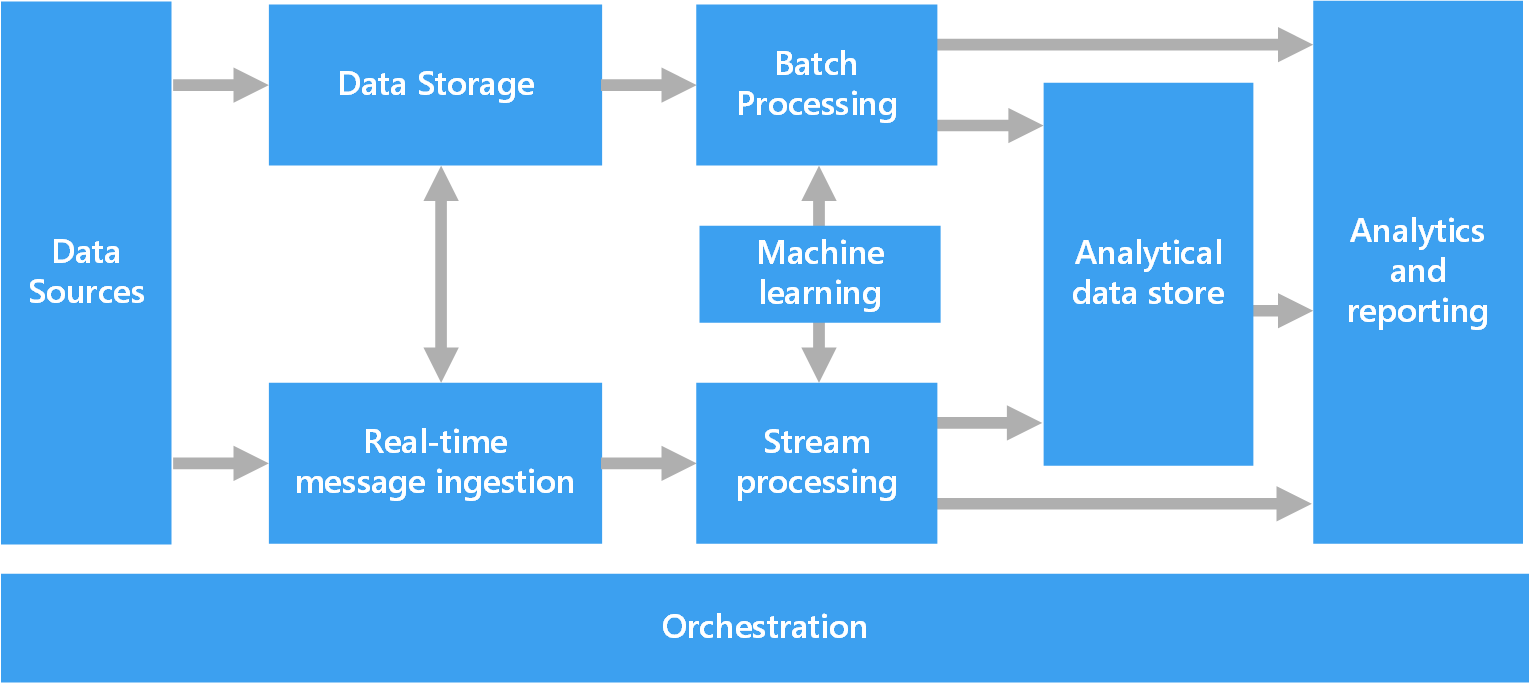

**Figure 1.** Components of a big data analytics architecture.

# Lakehouses 

The lakehouse is the most recent architecture to attempt to address the shortcomings we discussed above. It is a new, open architecture that combines the best elements of data lakes and data warehouses. Lakehouses are enabled by a new open and standardized system design: implementing similar data structures and data management features to those in a data warehouse, directly on the kind of low cost storage used for data lakes. They are what you would get if you had to redesign data warehouses in the modern world, now that cheap and highly reliable storage (in the form of object stores) are available.

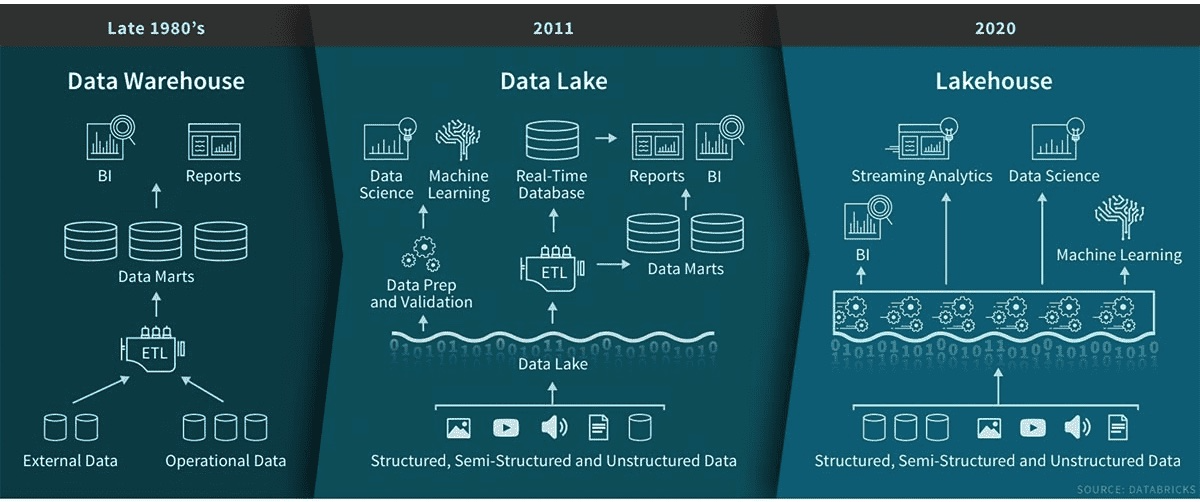

**Figure 2.** Differences between a data warehouse, a data lake, and a lakehouse.


Whereas data lakes are entirely agnostic about what kind of data you put in them, the lakehouse approach specifies how to build data lakes in such a way that you can get much of the benefits of data warehouses: reliability, performance, and data quality management, while retaining the openness and scale of data lakes. Some of the strengths of a lakehouse over a vanilla data lake are:

- **ACID transactions**: Every operation is transactional. This means that every operation either fully succeeds or aborts. When aborted, it’s logged, and any residue is cleaned so you can retry later. Modification of existing data is possible because transactions allow you to do fine-grained updates. Real-time operations are consistent, and the historical data versions are automatically stored. The lakehouse also provides snapshots of data to allow developers to easily access and revert to earlier versions for audits, rollbacks, or experiment reproductions.


- **Handling large metadata**: The lakehouse architecture treats metadata just like data. As a result, it can handle large tables and small files.


- **Indexing**: Along with data partitioning, the lakehouse architecture includes various statistical techniques. For example, bloom filters, a trick to avoid unnecessarily scanning through data blocks that can't have any query results in them to avoid reading big portions of the data altogether and deliver massive speed-ups.


- **Schema validation**: All your data that goes into a table must adhere strictly to a defined schema. If the data doesn't satisfy the schema, it’s moved into a quarantine area where you can examine it later and resolve the issues.

# Delta Lake

Let's look at an example of the lakehouse approach. Delta Lake is an open source project that enables building a lakehouse architecture using Spark. It is essentially a format that provides ACID transactions, scalable metadata handling, and unifies streaming and batch data processing on top of existing data lakes.

Specifically, Delta Lake offers:

- **ACID transactions on Spark**: Serializable isolation levels ensure that readers never see inconsistent data.


- **Scalable metadata handling:** Leverages Spark distributed processing power to handle all the metadata for petabyte-scale tables with billions of files.


- **Streaming and batch unification**: A table in Delta Lake is a batch table as well as a streaming source and sink. Streaming data ingest, backfilling of historical data, and interactive queries are all supported.


- **Schema enforcement**: Automatically handles schema violations to prevent insertion of bad records during ingestion.


- **Time travel**: Data versioning enables rollbacks, full historical audit trails, and reproducible machine learning experiments.


- **Updates, inserts, and deletes**: Supports merge, update, and delete operations to enable complex use cases like capturing data on what has changed, changes to star schema dimension tables, streaming inserts and updates, and so on.

Optimizations of the Delta Engine which sits on top of Spark make Delta Lake operations highly performant, supporting a variety of workloads ranging from large-scale ETL processing to ad-hoc, interactive queries.  Delta Lake can be added to an existing data lake and is fully compatible with Apache Spark APIs.

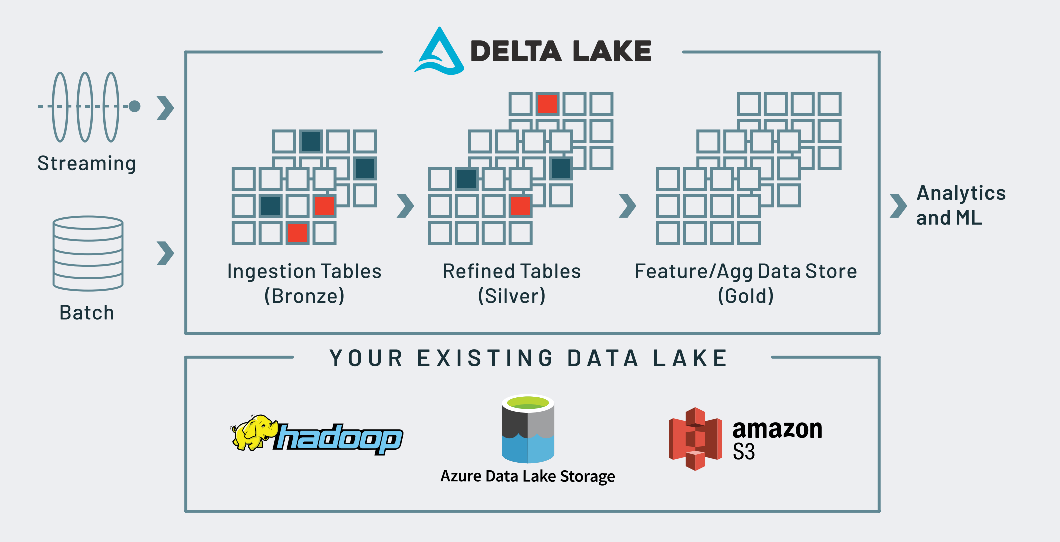

**Figure 3.** Delta Lake is an open-source storage layer that converts a data lake into a lakehouse.

The Databricks Platform has the architectural features of a lakehouse. Microsoft’s Azure Synapse Analytics service, which integrates with Azure Databricks, enables a similar lakehouse pattern. Other managed services such as BigQuery and Redshift Spectrum have some of the lakehouse features listed above, but they are examples that focus primarily on BI and other SQL applications.

Delta Lake is not the only data format that organizations can use to build and implement a lakehouse. Some other examples of emerging open source projects that are suitable include Apache Iceberg and Apache Hudi.

- Apache Iceberg is an open table format for huge analytic datasets. Iceberg adds tables to Spark that use a high-performance format that works just like a SQL table. You can refer to Apache Iceberg here: https://iceberg.apache.org/


- Apache Hudi is another format that was developed by Uber Engineering. You can refer to Hudi here: https://eng.uber.com/hoodie/#:~:text=Data%3A%20Hudi%20stores%20all%20ingested,Default%20is%20Apache%20Parquet.


You can find more information on the Delta Lake project here: https://delta.io/.

# Techniques for Securing Data

Here we summarize some of the key security techniques and terminology that a data scientist needs to be familiar with.

## Authentication and authorization
These terms are sometimes used interchangeably by non-experts, but are distinct concepts. **Authentication** is the process of determining who a user is by what credentials they provide, such as a correct password or response with a correct code that was sent to their cellphone. **Authorization** is the process of determining what a specific user is allowed to do, either as an unauthenticated user, or once authenticated, at which point their specific access permissions can be looked up in a database.

## Perimeters and firewalls

The notion of **perimeters** is fundamental to data and systems security. A perimeter is a virtual seal around a network, such that all connection points with other networks are controlled. These connection points are managed by firewalls.

**Firewalls** are specialized routers that control access between one network and another. Businesses are increasingly integrating their processes with their supply chain partners and/or doing some processing offshore or in the “cloud”. Maintaining all the firewall rules to allow only specific systems to communicate with each other has become a very challenging task.


## Identity and access management (IAM)

Many large organizations have moved user login and permissions out of individual applications into a centralized, standardized control system called an **identity and access management** (IAM) system. IAM's are used to enable/disable access to all of a user's applications and services from a single place. They are sometimes connected to physical security systems as well so that, for example, a multinational corporation can disable cardkey access worldwide for a terminated employee with one click.

IAM systems typically have the following capabilities:

- **User management**: User registration and cancellation
- **Authentication management**: What credentials (such a password or biometrics) a user must provide
- **Authorization management**: What roles get access to what application capabilities and data
- **Access management**: Which user has which role
- **Data management and provisioning**: Categorizing data by access restrictions, quality, etc.
- **Monitoring and auditing**: Configuring tracking of who accessed what and when

Business operations that are supported by IAM processes include:

- **Provisioning**: Providing access to the applications a new employee needs to do their job
- **Credential and attribute management**: Passwords or other multifactor authentication methods
- **Entitlement management**: What data and/or application capabilities the user is allowed to have access to
- **Compliance management**: Confirming periodically with employees' managers that their access profile is still appropriate
- **Identity federation management**: Providing management of single sign-on
- **Centralization of authentication and authorization**: All controlled from one place

## Security tokens

When a user signs on to an application (possibly involving an IAM system) they are given a unique token. This is a very large, unique random number generated by the sign-on process, typically held in a cookie in the user’s browser.
The browser automatically sends the cookie with every message to the server, so that the server can identify who the message came from.

## Role-based access control (RBAC)

Modern systems allow users to be associated with roles (e.g. sys admin, superuser, anonymous user) and the roles be assigned specific permissions. This way a person can be assigned a large number of detailed permissions that they get by virtue of their role in the organization, rather than needing to specify every individual access permission for each user.

## Encryption

Encrypting data while at rest or in transit helps secure the data. Encryption can be implemented using either symmetric or asymmetric techniques.

- **Symmetric encryption** uses a single secret key for both encryption and decryption. It is far faster than asymmetric so it is used for encryption of large data volumes.


- **Asymmetric encryption** uses two different keys: one public and one private. Anyone can send an encrypted message to a recipient by using the recipient’s public key. Only the recipient knows the private key with which the recipient can decrypt the message. 

Data at rest can be encrypted before being stored, thus keeping it secure. SSL connections can keep data secure while in transit.

## Intrusion prevention and detection

**Intrusion prevention** methods are techniques for avoiding unwanted users from gaining access to a network or database in the first place. Some examples include: disabling ethernet ports at empty employee workstations, not running data cables through shared office space, locking out a user from an application after several unsuccessful login attempts, etc.

**Intrusion detection** tools watch a network or database and immediately notify a systems security specialist if something is amiss. Intrusion detection often uses machine learning techniques to detect anomalous network behavior or system events.

Logging of events is also important. If an intrusion occurs despite preventive techniques, it's important to be able to trace what happened after the fact. It helps in assessing and possibly reversing any damage that occurred and may provide insight as to who was responsible.

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, you may proceed to the next module.

# References

* Inmon, W. H. (2002). Building the DataWarehouse. John Wiley & Sons.


* Data warehouse Concepts from Astera blog: https://www.astera.com/type/blog/data-warehouse-concepts/


* Databricks Blog: https://databricks.com/blog/2020/01/30/what-is-a-data-lakehouse.html


* Lakehouse: A New Generation of Open Platforms that Unify Data Warehousing and Advanced Analytics by Michael Armbrust , Ali Ghodsi, Reynold Xin , Matei Zaharia, CIDR 2021.


* Delta Lake: High-Performance ACID Table Storage over Cloud Object Stores by Michael Armbrust, Tathagata Das, Liwen Sun, Burak Yavuz, Shixiong Zhu, Mukul Murthy, Joseph Torres, Herman van Hovell, Adrian Ionescu, Alicja Łuszczak, Michał ́Switakowski, Michał Szafra ́nski, Xiao Li, Takuya Ueshin, Mostafa Mokhtar, Peter Boncz, Ali Ghodsi, Sameer Paranjpye, Pieter Senster, Reynold Xin, Matei Zaharia, VLDB 2020.


* Jagare, U. (2020). The Modern Cloud Data Platform For Dummies, DataBricks Special Edition. John Wiley& Sons.


* Delta Lake blog:  https://delta.io/


* Apache Iceberg page: https://iceberg.apache.org/


* Apache Hudi page: https://hudi.apache.org/


* Uber's Engineering blog on Hudi : https://eng.uber.com/hoodie/#:~:text=Data%3A%20Hudi%20stores%20all%20ingested,Default%20is%20Apache%20Parquet


* Microsoft docs on Bigdata Architecture: https://docs.microsoft.com/en-us/azure/architecture/guide/architecture-styles/big-data#:~:text=A%20big%20data%20architecture%20is,big%20data%20sources%20at%20rest


- CSA (Cloud Security Alliance). (2013). CSA Releases the Expanded Top Ten Big Data Security & Privacy Challenges. https://cloudsecurityalliance.org/articles/csa-releases-the-expanded-top-ten-big-data-security-privacy-challenges/


- McMillan LLP. (2015). Bell Gets a Bad Rap for its RAP (Relevant Advertising Program). https://mcmillan.ca/insights/bell-gets-a-bad-rap-for-its-rap-relevant-advertising-program/


- Priyank, J., Manasi, G. & Nilay, K. (2016). Big data privacy: a technological perspective and review. Journal of Big Data 2016 3(25). 26 November 2016. https://doi.org/10.1186/s40537-016-0059-y


- TechTarget. (2019). What is data governance and why does it matter?. https://searchdatamanagement.techtarget.com/definition/data-governance


- White. (2019). What is COBIT? A framework for alignment and governance. https://www.cio.com/article/3243684/methodology-frameworks/what-is-cobit-a-framework-for-alignment-and-governance.html